## Importing Libraries

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
import math

## Reading CSV file

In [2]:
df = pd.read_csv('EDA_data.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,30.0,30.0,30.0,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,30.0,30.0,30.0,700 S HILL ST,NaN,34.0459,-118.2545
2,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,30.0,30.0,700 S BROADWAY,NaN,34.0452,-118.2534
3,200100509,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,30.0,30.0,30.0,15TH,OLIVE,34.0359,-118.2648
4,200100510,01/05/2020 12:00:00 AM,01/05/2020 12:00:00 AM,955,1,Central,111,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,30.0,30.0,30.0,800 N ALAMEDA ST,OLIVE,34.0615,-118.2412


Creating the data frame for the new data set which we created from the raw dataset.

In [7]:
#Replcing non true values about the data set
df['Vict Age']= df['Vict Age'].replace(-1, 34)
df['Vict Age']= df['Vict Age'].replace(0, 34)
df['Vict Age']= df['Vict Age'].replace(120, 30)

df['Vict Age'].describe()

count    200378.000000
mean         37.190265
std          14.724058
min           2.000000
25%          27.000000
50%          34.000000
75%          46.000000
max          99.000000
Name: Vict Age, dtype: float64

Victim Age cannot be negative or zero. so replacing them with the mean value

In [ ]:
#Instead of dropping or deleting the columns, creating a new data frame Final_df
#Copying the required columns from the dataframe to Final_df
#Final_df is the data frame where all the ML models are executed

Final_df = df[['AREA NAME', 'Weapon Desc','Crm Cd Desc', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Vict Age', 'AREA']].copy()

## Exploring the data 

In [38]:
Final_df.head(10)

,AREA NAME,Weapon Desc,Crm Cd Desc,Vict Sex,Vict Descent,Premis Desc,Vict Age,AREA
0,Southwest,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",BATTERY - SIMPLE ASSAULT,F,B,SINGLE FAMILY DWELLING,36,3
1,Central,UNKNOWN WEAPON/OTHER WEAPON,BATTERY - SIMPLE ASSAULT,M,H,SIDEWALK,25,1
2,Central,UNKNOWN WEAPON/OTHER WEAPON,"RAPE, FORCIBLE",F,H,NIGHT CLUB (OPEN EVENINGS ONLY),25,1
3,Central,ROCK/THROWN OBJECT,BURGLARY FROM VEHICLE,M,A,STREET,29,1
4,Central,VERBAL THREAT,CRIMINAL THREATS - NO WEAPON DISPLAYED,M,O,PARKING LOT,35,1
5,Central,UNKNOWN WEAPON/OTHER WEAPON,ARSON,X,X,DEPARTMENT STORE,34,1
6,Mission,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",INTIMATE PARTNER - SIMPLE ASSAULT,F,H,SINGLE FAMILY DWELLING,24,19
7,Northeast,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",INTIMATE PARTNER - SIMPLE ASSAULT,F,H,SINGLE FAMILY DWELLING,34,11
8,Harbor,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",THEFT PLAIN - PETTY ($950 & UNDER),F,W,SIDEWALK,29,5
9,Central,FOLDING KNIFE,ROBBERY,M,B,ALLEY,66,1


In [143]:
#describing the data
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.003780e+05,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000
mean,2.102554e+08,1351.535987,10.510355,1097.237865,1.545220,507.297118,37.190265,313.177300,361.379697,506.586671,157.963484,36.376458,30.186488,33.920541,-117.848849
std,7.940633e+06,673.198024,6.211493,619.734302,0.497952,240.614598,14.724058,214.714775,124.195874,240.107025,320.890655,77.824900,13.373951,2.193052,7.610327
min,1.030447e+07,1.000000,1.000000,101.000000,1.000000,110.000000,2.000000,101.000000,101.000000,110.000000,30.000000,30.000000,30.000000,0.000000,-118.667200
25%,2.015070e+08,910.000000,5.000000,524.000000,1.000000,230.000000,27.000000,102.000000,308.000000,230.000000,30.000000,30.000000,30.000000,33.996900,-118.402200
50%,2.108085e+08,1435.000000,11.000000,1162.000000,2.000000,624.000000,34.000000,210.000000,400.000000,624.000000,30.000000,30.000000,30.000000,34.050100,-118.304600
75%,2.202061e+08,1915.000000,16.000000,1619.000000,2.000000,626.000000,46.000000,502.000000,400.000000,626.000000,30.000000,30.000000,30.000000,34.118100,-118.269600
max,2.299050e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,99.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [141]:
#Information about data
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200378 entries, 0 to 200377
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA NAME     200378 non-null  object
 1   Weapon Desc   200378 non-null  object
 2   Crm Cd Desc   200378 non-null  object
 3   Vict Sex      200378 non-null  object
 4   Vict Descent  200378 non-null  object
 5   Premis Desc   200378 non-null  object
 6   Vict Age      200378 non-null  int64 
 7   AREA          200378 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 12.2+ MB


In [34]:
#types of Data
Final_df.dtypes

AREA NAME       object
Weapon Desc     object
Crm Cd Desc     object
Vict Sex        object
Vict Descent    object
Premis Desc     object
Vict Age         int64
AREA             int64
dtype: object

In [148]:
#Checking the shape of data
Final_df.shape

(200378, 8)

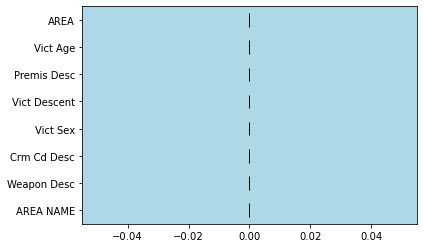

In [151]:
#Checking for null
Final_df.isnull().sum().sort_values(ascending=True).plot.barh(color = 'sandybrown', edgecolor='k')
plt.show()

Since the data has previously been cleaned, there are no null values in the new data.

## Target Variable Count

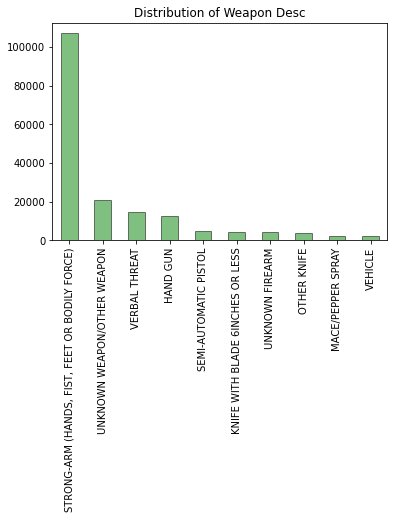

In [10]:
Final_df['Weapon Desc'].value_counts().head(10).plot.bar(color = 'g', alpha = 0.5, edgecolor = 'k')
plt.title('Distribution of Weapon Desc')
plt.show()

Cosidering different types of weapons as a target column

## Modelling and Feature Engineering

In [ ]:
#Setting the categorical columns and numerical columns

cat_vars = ['AREA NAME', 'Crm Cd Desc', 'Vict Sex', 'Vict Descent', 'Premis Desc']
num_vars = ['Vict Age', 'AREA']

### Creating Pipelines

In [39]:
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(missing_values= np.NaN, strategy='most_frequent')),
                         ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', cat_pipeline, cat_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['Vict Age', 'AREA']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['AREA NAME', 'Crm Cd Desc', 'Vict Sex',
                                  'Vict Descent', 'Premis Desc'])])


Considered 'median' for numeric features and 'most_frequent' for categorical features in simple imputer

## Spliting the data

The data is split into two parts 
1. Train data
2. Test data

In [155]:
from sklearn.model_selection import train_test_split

In [ ]:
features = [x for x in Final_df.columns if (x != 'Weapon Desc')]
#Here we are removing the target column

X = Final_df[features]
y = Final_df['Weapon Desc']
#Here target column is assigned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=143)

In [40]:
print(f'Training data: {X_train.shape[0]:,}')
print(f'Test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Training data: 160,302
Test data: 40,076

Features:
AREA NAME
Crm Cd Desc
Vict Sex
Vict Descent
Premis Desc
Vict Age
AREA


In [119]:
print(X_train)

          AREA NAME                                     Crm Cd Desc Vict Sex  \
0           Pacific           INTIMATE PARTNER - AGGRAVATED ASSAULT        M   
1       N Hollywood                        BATTERY - SIMPLE ASSAULT        M   
2           Rampart                                         ROBBERY        M   
3           Rampart  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        M   
4          Van Nuys                                         ROBBERY        X   
...             ...                                             ...      ...   
160297    Northeast          CRIMINAL THREATS - NO WEAPON DISPLAYED        M   
160298  N Hollywood               INTIMATE PARTNER - SIMPLE ASSAULT        F   
160299      West LA                        BATTERY - SIMPLE ASSAULT        F   
160300    Northeast                              FALSE IMPRISONMENT        F   
160301     Van Nuys           INTIMATE PARTNER - AGGRAVATED ASSAULT        M   

       Vict Descent                    

In [122]:
print(y_train)

0         STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
1         STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
2         STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
3                       KNIFE WITH BLADE 6INCHES OR LESS
4                            UNKNOWN WEAPON/OTHER WEAPON
                               ...                      
160297                                     VERBAL THREAT
160298    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
160299    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
160300                                          HAND GUN
160301                                 MACE/PEPPER SPRAY
Name: Weapon Desc, Length: 160302, dtype: object


In [120]:
print(X_test)

        AREA NAME                               Crm Cd Desc Vict Sex  \
0        Van Nuys                  BATTERY - SIMPLE ASSAULT        M   
1         Olympic                           ORAL COPULATION        F   
2         Olympic                  BATTERY - SIMPLE ASSAULT        F   
3         Olympic   CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        M   
4         Pacific         INTIMATE PARTNER - SIMPLE ASSAULT        M   
...           ...                                       ...      ...   
40071     West LA    CRIMINAL THREATS - NO WEAPON DISPLAYED        F   
40072    Foothill  SHOPLIFTING - PETTY THEFT ($950 & UNDER)        M   
40073     Topanga         INTIMATE PARTNER - SIMPLE ASSAULT        F   
40074      Newton                        FALSE IMPRISONMENT        M   
40075  Devonshire                  BATTERY - SIMPLE ASSAULT        M   

      Vict Descent                                        Premis Desc  \
0                W  SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEM

In [121]:
print(y_test)

0        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
1        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
2        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
3        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
4        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
                              ...                      
40071                                     VERBAL THREAT
40072                       UNKNOWN WEAPON/OTHER WEAPON
40073    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
40074    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
40075    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
Name: Weapon Desc, Length: 40076, dtype: object


## Classification Models

Declaring and Creating pipelines for all the four Classification models.
1. Logistic Regression
2. Decision Tree Classifier
3. Random forest Classifier
4. K-Nearest Neighbour (KNN)  

In [46]:
classification1 = LogisticRegression(max_iter=200)
classification2 = DecisionTreeClassifier()
classification3 = RandomForestClassifier()
classification4 = KnnClassifier()

Creating pipelines for the classification models

In [47]:
pipeline1 = Pipeline([('data_processing', processing_pipeline),('logreg', classification1)])
pipeline2 = Pipeline([('data_processing', processing_pipeline),('tree', classification2)])
pipeline3 = Pipeline([('data_processing', processing_pipeline),('rf', classification3)])
pipeline4 = Pipeline([('data_processing', processing_pipeline),('knn', classification3)])

## Logistic Regression

In [49]:
param_lr= [
  {'logreg__class_weight': ['balanced'], 'logreg__C':[ 0.005, 0.01,0.03, 0.05,0.75, 0.1, 0.5 ],'logreg__solver':['saga','sag']}
 ]
gcv_lr = GridSearchCV(estimator=pipeline1, param_grid=param_lr, scoring=['accuracy'], cv=5, refit='accuracy',verbose=5)
gcv_lr = gcv_lr.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=saga; accuracy: (test=0.301) total time= 1.6min
[CV 2/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=saga; accuracy: (test=0.274) total time= 1.6min
[CV 3/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=saga; accuracy: (test=0.215) total time= 1.6min
[CV 4/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=saga; accuracy: (test=0.317) total time= 1.7min
[CV 5/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=saga; accuracy: (test=0.215) total time= 1.6min
[CV 1/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=sag; accuracy: (test=0.307) total time= 1.4min
[CV 2/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=sag; accuracy: (test=0.262) total time= 1.4min
[CV 3/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solv

In [50]:
gcv_lr.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Vict Age', 'AREA']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['AREA NAME', 'Crm Cd Desc',
                                                   'Vict Sex', 'Vict Descent',
                                                   'Premis Desc'])])),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=200, solver='sag'))])

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

## Making predictions and estimating performance on the test set.

In [107]:
from sklearn.metrics import classification_report

lr_model = Pipeline([('processing_pipeline', processing_pipeline),
                           ('model', LogisticRegression(C=50, solver='liblinear'))])

lr_model.fit(X_train,y_train)
logistic_predict = lr_model.predict(X_test)
print("Testing Scores:: Classification Report:\n")
print(classification_report(y_test, logistic_predict))

Testing Scores:: Classification Report:

                                                precision    recall  f1-score   support

              AIR PISTOL/REVOLVER/RIFLE/BB GUN       0.00      0.00      0.00       215
                               ANTIQUE FIREARM       0.00      0.00      0.00         2
                   ASSAULT WEAPON/UZI/AK47/ETC       0.00      0.00      0.00        11
              AUTOMATIC WEAPON/SUB-MACHINE GUN       0.00      0.00      0.00         3
                                           AXE       0.00      0.00      0.00        57
                BELT FLAILING INSTRUMENT/CHAIN       0.00      0.00      0.00        87
                                     BLACKJACK       0.00      0.00      0.00         2
                              BLUNT INSTRUMENT       0.06      0.01      0.01       184
                                         BOARD       0.06      0.03      0.04        40
                                   BOMB THREAT       0.31      0.22      0.26 

In [54]:
confusion_matrix(y_test, ypred_lr)

array([[   3,    1,    6, ...,    9,   18,    1],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    1,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   1,    9,    6, ...,   12,   83,    0],
       [   0,   10,   11, ...,   12,    5, 2133]], dtype=int64)

## ROC curve

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ValueError: num must be 1 <= num <= 6, not 7

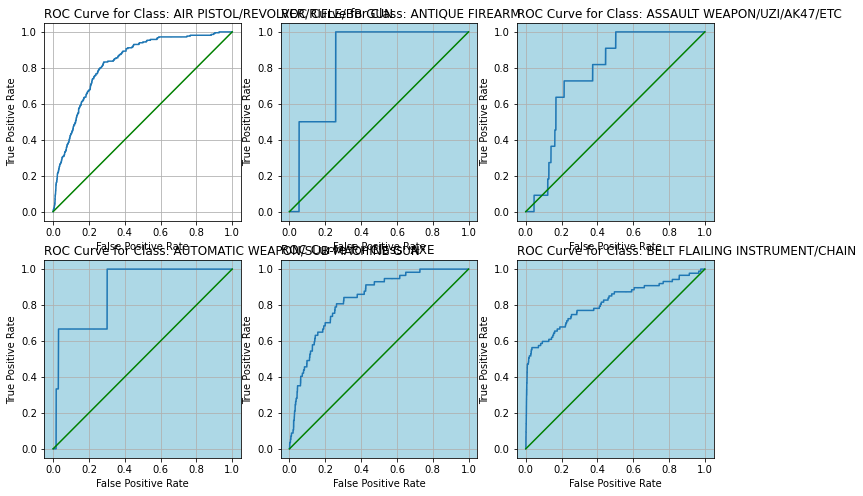

In [138]:
y_pred = gcv_lr.predict(X_test)
y_proba = gcv_lr.predict_proba(X_test)
classes = gcv_lr.classes_


plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]    
    
    # Prepares an auxiliar dataframe to help with the plots
    Final_df_aux = X_test.copy()
    Final_df_aux['class'] = [1 if y == c else 0 for y in y_test]
    Final_df_aux['prob'] = y_proba[:, i]
    Final_df_aux = Final_df_aux.reset_index(drop = True)

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+1)
    tpr, fpr = get_all_roc_coordinates(Final_df_aux['class'], Final_df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    cx = "ROC Curve for Class: " + c
    ax_bottom.set_title(cx, loc='left')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(Final_df_aux['class'], Final_df_aux['prob'])   
plt.tight_layout()

## Decision Tree

In [83]:
param_tree = [
  {'tree__max_depth': [10, 25, 50],
   'tree__min_samples_split':[10, 25, 50, 100],
   'tree__min_samples_leaf': [50,100],
   'tree__class_weight':['balanced']
  }
 ]

gcv_tree = GridSearchCV(estimator=pipe2, param_grid=param_tree, scoring='accuracy', refit=True, verbose=10)
gcv_tree = gcv_tree.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10
[CV 1/5; 1/24] END tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10;, score=0.192 total time=   2.3s
[CV 2/5; 1/24] START tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10
[CV 2/5; 1/24] END tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10;, score=0.218 total time=   2.2s
[CV 3/5; 1/24] START tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10
[CV 3/5; 1/24] END tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10;, score=0.238 total time=   2.2s
[CV 4/5; 1/24] START tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree

In [84]:
gcv_tree.best_estimator_


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Vict Age', 'AREA']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['AREA NAME', 'Crm Cd Desc',
                                                   'Vict Sex', 'Vict Descent',
                                                   'Premis Desc'])])),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=50,
                                        min_samples_leaf=50,
                                        min_samples_split=10))])

In [164]:
d_model = Pipeline([('processing_pipeline', processing_pipeline),
                           ('model', DecisionTreeClassifier(max_depth=80, min_samples_split=0.001))])
d_model.fit(X_train,y_train)
decision_predict = d_model.predict(X_test)
print("Testing Scores:: Classification Report:\n")
print(classification_report(y_test, decision_predict))

Testing Scores:: Classification Report:

                                                precision    recall  f1-score   support

              AIR PISTOL/REVOLVER/RIFLE/BB GUN       0.05      0.00      0.01       215
                               ANTIQUE FIREARM       0.00      0.00      0.00         2
                   ASSAULT WEAPON/UZI/AK47/ETC       0.00      0.00      0.00        11
              AUTOMATIC WEAPON/SUB-MACHINE GUN       0.00      0.00      0.00         3
                                           AXE       0.00      0.00      0.00        57
                BELT FLAILING INSTRUMENT/CHAIN       0.20      0.01      0.02        87
                                     BLACKJACK       0.00      0.00      0.00         2
                              BLUNT INSTRUMENT       0.03      0.01      0.01       184
                                         BOARD       0.00      0.00      0.00        40
                                   BOMB THREAT       0.00      0.00      0.00 

In [89]:
confusion_matrix(y_test, ypred_lr)

array([[   3,    1,    6, ...,    9,   18,    1],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    1,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   1,    9,    6, ...,   12,   83,    0],
       [   0,   10,   11, ...,   12,    5, 2133]], dtype=int64)

## Random Forest

In [102]:
random_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('rf', RandomForestClassifier())]
)

param_grid = [{'rf__max_depth': [5, 8, 10, 12],
               'rf__n_estimators': [10, 50, 100],
               'rf__class_weight': [None, 'balanced', 'balanced_subsample'],
               'rf__max_samples': [1000, 2000, 5000]
              }]

random_results = GridSearchCV(estimator=random_pipeline, param_grid=param_grid, scoring='recall', refit=True)
random_results = random_results.fit(X_train, y_train)
random_yhat = random_results.predict(X_test)
random_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Vict Age', 'AREA']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['AREA NAME', 'Crm Cd Desc',
                                                   'Vict Sex', 'Vict Descent',
                                                   'Premis Desc'])])),
                ('rf',
                 RandomForestClassifier(max_depth=5, max_samples=1000,
                                        n_estimators=10))])

In [103]:
y_testp = random_results.predict(X_test)
y_testp_rf = random_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

                                                precision    recall  f1-score   support

              AIR PISTOL/REVOLVER/RIFLE/BB GUN       0.00      0.00      0.00       215
                               ANTIQUE FIREARM       0.00      0.00      0.00         2
                   ASSAULT WEAPON/UZI/AK47/ETC       0.00      0.00      0.00        11
              AUTOMATIC WEAPON/SUB-MACHINE GUN       0.00      0.00      0.00         3
                                           AXE       0.00      0.00      0.00        57
                BELT FLAILING INSTRUMENT/CHAIN       0.00      0.00      0.00        87
                                     BLACKJACK       0.00      0.00      0.00         2
                              BLUNT INSTRUMENT       0.00      0.00      0.00       184
                                         BOARD       0.00      0.00      0.00        40
                                   BOMB THREAT       0.00      0.00      0.00        18
                               

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_p = Pipeline([('processing_pipeline', processing_pipeline),
                  ('knn_classifier',KNeighborsClassifier())])
params = {'knn_classifier__n_neighbors':[1,5,10]}
knn = GridSearchCV(estimator=knn_p, param_grid=params, scoring='f1_weighted', refit=True, cv=5)
knn = knn.fit(X_train, y_train)

In [110]:
print(knn.best_estimator_)
print("\n")
print(f'Validation score: {knn.best_score_:.2%}')
print(f'Test score: {knn.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing_pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Vict Age', 'AREA']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
        

In [111]:
knn_model = Pipeline([('processing_pipeline', processing_pipeline),
                  ('knn_classifier',KNeighborsClassifier(n_neighbors=10))])

print("Testing Scores:: Classification Report:\n")
knn_model.fit(X_train,y_train)
decision_predict = knn_model.predict(X_test)
print(classification_report(y_test, decision_predict))

Testing Scores:: Classification Report:

                                                precision    recall  f1-score   support

              AIR PISTOL/REVOLVER/RIFLE/BB GUN       0.06      0.07      0.06       215
                               ANTIQUE FIREARM       0.00      0.00      0.00         2
                   ASSAULT WEAPON/UZI/AK47/ETC       0.00      0.00      0.00        11
              AUTOMATIC WEAPON/SUB-MACHINE GUN       0.00      0.00      0.00         3
                                           AXE       0.06      0.02      0.03        57
                BELT FLAILING INSTRUMENT/CHAIN       0.06      0.01      0.02        87
                                     BLACKJACK       0.00      0.00      0.00         2
                              BLUNT INSTRUMENT       0.04      0.02      0.03       184
                                         BOARD       0.09      0.07      0.08        40
                                   BOMB THREAT       0.25      0.11      0.15 

In [131]:
def get_all_roc_coordinates(y_real, y_proba):

    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

## Conclusion for the best Model

In [167]:
print("Training Scores for LR Model: Classification Report:\n")
print(classification_report(y_test, logistic_predict))
print("Training Scores for DT Model: Classification Report:\n")
print(classification_report(y_test, decision_predict))
print("Training Scores for RD Model: Classification Report:\n")
print(classification_report(y_test, y_testp))
print("Training Scores for KNN Model: Classification Report:\n")
print(classification_report(y_test, decision_predict))

Training Scores for LR Model: Classification Report:

                                                precision    recall  f1-score   support

              AIR PISTOL/REVOLVER/RIFLE/BB GUN       0.00      0.00      0.00       215
                               ANTIQUE FIREARM       0.00      0.00      0.00         2
                   ASSAULT WEAPON/UZI/AK47/ETC       0.00      0.00      0.00        11
              AUTOMATIC WEAPON/SUB-MACHINE GUN       0.00      0.00      0.00         3
                                           AXE       0.00      0.00      0.00        57
                BELT FLAILING INSTRUMENT/CHAIN       0.00      0.00      0.00        87
                                     BLACKJACK       0.00      0.00      0.00         2
                              BLUNT INSTRUMENT       0.06      0.01      0.01       184
                                         BOARD       0.06      0.03      0.04        40
                                   BOMB THREAT       0.31      0.

## Best Classification Models

Suprisingly Logistic Regression, Decision Tree and KNN Model has a same accuracy value. So, any of the three models can be selected for this data.
The accury in all the models is 64% which can be improved by using better models and techniques.

## Summary

The most prevalent weapon will undoubtedly be bodily force, which includes their hands, fists, or feet. It goes without saying that a weak person cannot stand up to a strong person's man-handling. I believe that everyone should focus on their strengths, which will not only benefit them but may also benefit someone else in need. The second weapon is unknown, which indicates that anything is in their possession at the time might be utilized. Then there's the handgun and pistol, which should only be used for self-defense and not to intentionally harm innocent people.These are the top weapons that are used in the Los-Angeles crime according to the data.

## References:

    [1]https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb
    [2]https://github.com/appliedecon/data602-lectures